<font color="blue" size=5><b>Decision Tree</b></font>

In [119]:
from sklearn.datasets import load_iris
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [120]:
iris=load_iris()

In [121]:
X=iris.data

In [122]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [124]:
X_train.shape

(120, 4)

In [125]:
X_test.shape

(30, 4)

In [126]:
from sklearn.tree import DecisionTreeClassifier

<font color="red" size=3><b>Decision tree for Classification problem </b></font>

In [127]:
clf=DecisionTreeClassifier()

In [128]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
y_pred=clf.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification)


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [131]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

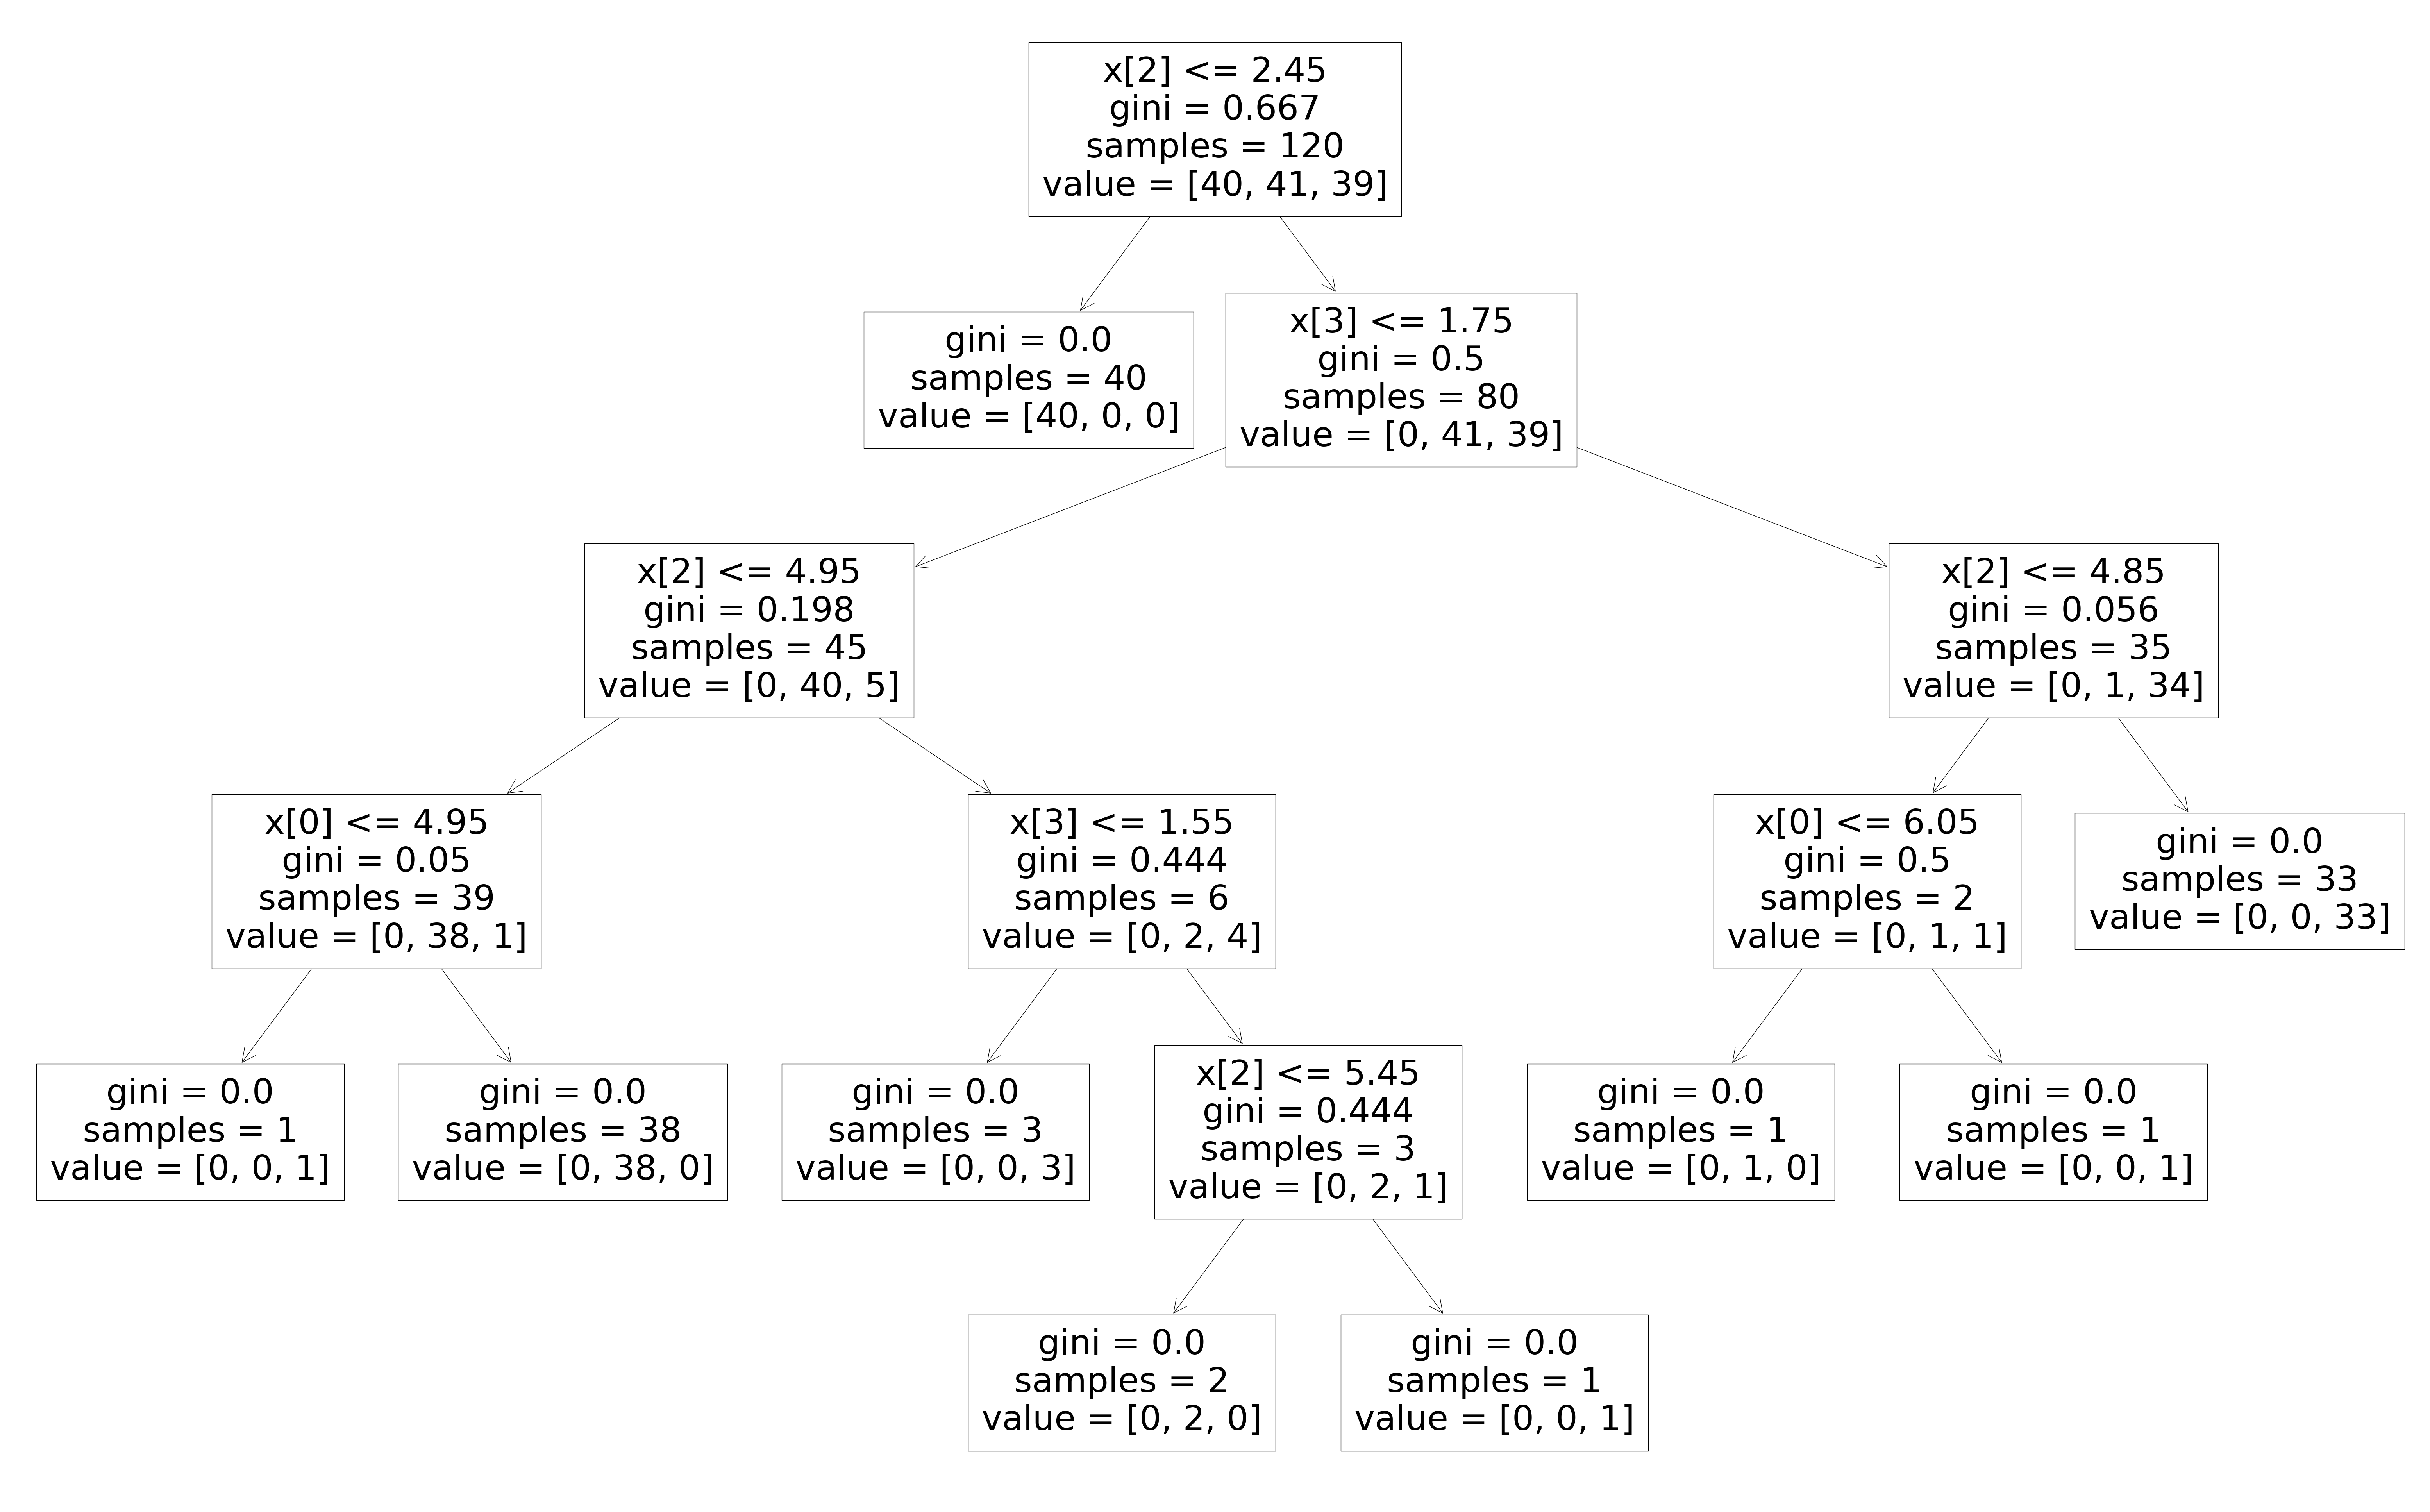

In [132]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf)

<font color="red" size=3><b>Decision tree for Regression
 problem </b></font>

In [133]:
df1 = pd.read_csv('BostonHousing.csv')
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [134]:
X1 = df1.iloc[:,0:13]
y1 = df1.iloc[:,13]

In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

In [136]:
rt = DecisionTreeRegressor(criterion = 'squared_error')

In [137]:
rt.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [138]:
y1_pred = rt.predict(X1_test)

In [139]:
from sklearn.metrics import mean_squared_error
print("Test Set MSE:", mean_squared_error(y1_test, y1_pred))

Test Set MSE: 10.444705882352942


In [140]:
r2_score(y1_test,y1_pred)

0.8575730661608084

In [141]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [142]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
# reg1 = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid1)

In [143]:
reg.fit(X1_train,y1_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [144]:
reg.best_score_


0.7532681196543087

In [145]:
reg.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [146]:
from sklearn.metrics import mean_squared_error

best_model = DecisionTreeRegressor(**reg.best_params_)
best_model.fit(X1_train, y1_train)




y1_pred = best_model.predict(X1_test)
print("Test Set MSE:", mean_squared_error(y1_test, y1_pred))






Test Set MSE: 18.684034494249083
